In [1]:
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
use_cols = [
    'id', 'loan_amnt', 'int_rate', 'grade','issue_d', 'purpose',
    'home_ownership', 'annual_inc', 'open_acc', 'open_il_12m',
    'last_pymnt_d', 'loan_status', 'emp_title', 'emp_length'
]

data = pd.read_csv('lending_club.csv', usecols=use_cols).sample(
    10000, random_state=44)  # set a seed for reproducibility

data.head()

,id,loan_amnt,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,last_pymnt_d,open_il_12m
131079,5554979,23675.0,15.80,C,Fairmont Hotel,1 year,RENT,90000.0,Jun-2013,Current,debt_consolidation,4.0,Jan-2016,NaN
384935,16552323,7500.0,11.67,B,Electrician,1 year,OWN,102000.0,May-2014,Current,car,11.0,Jan-2016,NaN
73585,8185454,11150.0,9.25,A,Product Manager,2 years,RENT,72000.0,Oct-2013,Fully Paid,credit_card,6.0,Sep-2014,NaN
660814,56180166,8000.0,6.24,A,Manufacturing Manager,5 years,RENT,101400.0,Aug-2015,Current,debt_consolidation,20.0,Jan-2016,NaN
349757,16772363,34000.0,19.52,E,ASSISTANT PENSION ADMINISTRATOR,10+ years,RENT,99000.0,Jul-2014,Current,credit_card,12.0,Jan-2016,NaN


In [3]:
new_cols = [
    'customer_id', 'disbursed_amount', 'interest', 'market','date_issued', 'loan_purpose',
    'householder', 'income', 'number_open_accounts', 'number_credit_lines_12',
    'date_last_payment', 'target', 'employment', 'time_employed'
]

rename_dict = dict(zip(use_cols, new_cols))
rename_dict

{'id': 'customer_id',
 'loan_amnt': 'disbursed_amount',
 'int_rate': 'interest',
 'grade': 'market',
 'issue_d': 'date_issued',
 'purpose': 'loan_purpose',
 'home_ownership': 'householder',
 'annual_inc': 'income',
 'open_acc': 'number_open_accounts',
 'open_il_12m': 'number_credit_lines_12',
 'last_pymnt_d': 'date_last_payment',
 'loan_status': 'target',
 'emp_title': 'employment',
 'emp_length': 'time_employed'}

In [4]:
data.rename(columns=rename_dict, inplace=True)
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
131079,5554979,23675.0,15.80,C,Fairmont Hotel,1 year,RENT,90000.0,Jun-2013,Current,debt_consolidation,4.0,Jan-2016,NaN
384935,16552323,7500.0,11.67,B,Electrician,1 year,OWN,102000.0,May-2014,Current,car,11.0,Jan-2016,NaN
73585,8185454,11150.0,9.25,A,Product Manager,2 years,RENT,72000.0,Oct-2013,Fully Paid,credit_card,6.0,Sep-2014,NaN
660814,56180166,8000.0,6.24,A,Manufacturing Manager,5 years,RENT,101400.0,Aug-2015,Current,debt_consolidation,20.0,Jan-2016,NaN
349757,16772363,34000.0,19.52,E,ASSISTANT PENSION ADMINISTRATOR,10+ years,RENT,99000.0,Jul-2014,Current,credit_card,12.0,Jan-2016,NaN


In [5]:
# reset_index
data.reset_index(drop=True, inplace=True)
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,5554979,23675.0,15.80,C,Fairmont Hotel,1 year,RENT,90000.0,Jun-2013,Current,debt_consolidation,4.0,Jan-2016,NaN
1,16552323,7500.0,11.67,B,Electrician,1 year,OWN,102000.0,May-2014,Current,car,11.0,Jan-2016,NaN
2,8185454,11150.0,9.25,A,Product Manager,2 years,RENT,72000.0,Oct-2013,Fully Paid,credit_card,6.0,Sep-2014,NaN
3,56180166,8000.0,6.24,A,Manufacturing Manager,5 years,RENT,101400.0,Aug-2015,Current,debt_consolidation,20.0,Jan-2016,NaN
4,16772363,34000.0,19.52,E,ASSISTANT PENSION ADMINISTRATOR,10+ years,RENT,99000.0,Jul-2014,Current,credit_card,12.0,Jan-2016,NaN


In [6]:
# target
data['target'] = np.where(data.target.isin(['Default']), 1, 0)
data['target'].value_counts()

0    9983
1      17
Name: target, dtype: int64

In [7]:
data.index.max(),data.index.min()

(9999, 0)

In [8]:
# add a few defaulted
data.loc[np.random.randint(0,9999,100), 'target'] = 1
data['target'].value_counts()

0    9883
1     117
Name: target, dtype: int64

In [9]:
# add a few lines of credit
for col in ['number_open_accounts', 'number_credit_lines_12']:
    data[col] = data[col] + np.random.randint(0,3,len(data))    

In [10]:
data['number_open_accounts'].agg(['max', 'min'])

max    49.0
min     1.0
Name: number_open_accounts, dtype: float64

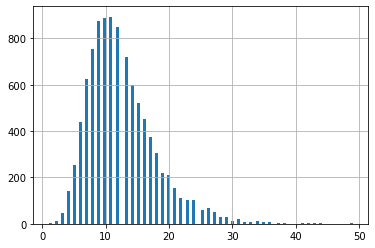

In [11]:
data['number_open_accounts'].hist(bins=100)

In [12]:
data['number_credit_lines_12'].agg(['max', 'min'])

max    6.0
min    0.0
Name: number_credit_lines_12, dtype: float64

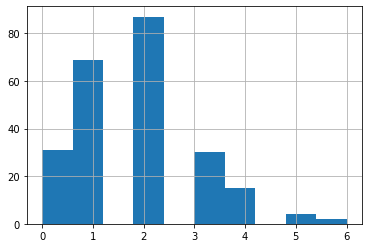

In [13]:
data['number_credit_lines_12'].hist()

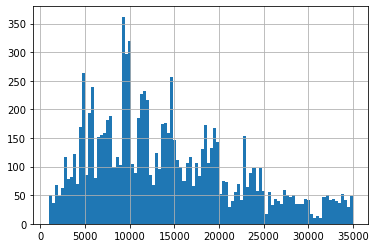

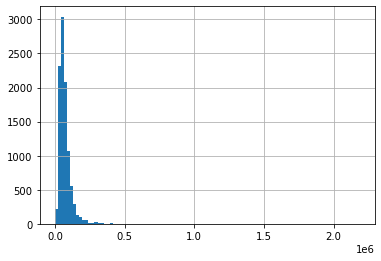

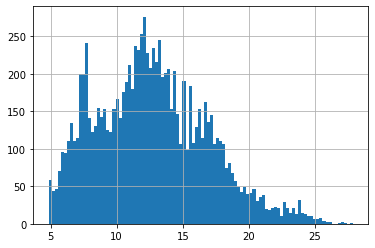

In [14]:
for col in ['disbursed_amount','income', 'interest']:
    data[col] = data[col] - data[col]*(np.random.randint(0,10,len(data))/100)
    data[col].hist(bins=100)
    plt.show()

In [15]:
data['market'].value_counts()

B    2846
C    2730
A    1673
D    1577
E     828
F     269
G      77
Name: market, dtype: int64

In [16]:
data['market'] = np.where(data['market'].isin(['G', 'F']), 'E', data['market'])
data['market'].value_counts()

B    2846
C    2730
A    1673
D    1577
E    1174
Name: market, dtype: int64

In [17]:
data['loan_purpose'].unique()

array(['debt_consolidation', 'car', 'credit_card', 'small_business',
       'house', 'moving', 'other', 'home_improvement', 'medical',
       'major_purchase', 'vacation', 'educational', 'wedding',
       'renewable_energy'], dtype=object)

In [18]:
replacement_dict = {
    'debt_consolidation': 'Debt consolidation',
    'credit_card': 'Debt consolidation',
    'car':'Car purchase',
    'small_business': 'Other',
    'house': 'Home improvements',
    'home_improvement': 'Home improvements',
    'medical': 'Health',
    'moving': 'Moving home',
    'other': 'Other', 
    'major_purchase': 'Other',
    'vacation': 'Holidays',
    'educational':'Other',
    'wedding': 'Wedding',
    'renewable_energy':'Other'
}

data['loan_purpose'] = data['loan_purpose'].map(replacement_dict)
data['loan_purpose'].value_counts()

Debt consolidation    8214
Other                  880
Home improvements      615
Car purchase            90
Health                  87
Holidays                48
Moving home             47
Wedding                 19
Name: loan_purpose, dtype: int64

In [19]:
data['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWN          986
OTHER          2
Name: householder, dtype: int64

In [20]:
data['householder'] = np.where(data['householder'].isin(['OWN', 'OTHER']), 'OWNER', data['householder'])
data['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [21]:
data[['date_issued', 'date_last_payment']].isnull().sum()

date_issued            0
date_last_payment    192
dtype: int64

In [22]:
from feature_engine.missing_data_imputers import RandomSampleImputer

imputer = RandomSampleImputer(variables='date_last_payment')
data = imputer.fit_transform(data)

data[['date_issued', 'date_last_payment']].isnull().sum()

date_issued          0
date_last_payment    0
dtype: int64

In [23]:
for col in ['date_issued', 'date_last_payment']:

    # create days at random
    days = np.random.randint(0, 27, len(data))
    
    # add dates to the date variable
    tmp = pd.to_datetime(data[col]) + pd.to_timedelta(days, unit="D")
    
    # recast as strings
    data[col] = tmp.apply(lambda x: x.strftime('%Y-%m-%d'))

data[['date_issued', 'date_last_payment']].head(10)

,date_issued,date_last_payment
0,2013-06-11,2016-01-14
1,2014-05-08,2016-01-25
2,2013-10-26,2014-09-26
3,2015-08-20,2016-01-26
4,2014-07-22,2016-01-11
5,2013-08-21,2015-01-10
6,2015-09-27,2016-01-02
7,2015-03-20,2016-01-10
8,2014-02-14,2015-08-01
9,2013-12-25,2016-01-08


In [24]:
data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [25]:
data['time_employed'].value_counts()

10+ years    3202
2 years       901
< 1 year      815
3 years       803
1 year        667
5 years       632
4 years       596
7 years       532
8 years       506
6 years       473
9 years       344
Name: time_employed, dtype: int64

In [26]:
data['time_employed'].isnull().sum()

529

In [27]:
data['time_employed'].unique()

array(['1 year', '2 years', '5 years', '10+ years', '3 years', '8 years',
       nan, '< 1 year', '6 years', '7 years', '9 years', '4 years'],
      dtype=object)

In [28]:
data.loc[data['time_employed'].isin([
    '1 year', '2 years', '5 years', '3 years', '< 1 year', '4 years']), 'time_employed'] = '<=5 years'

data.loc[data['time_employed'].isin([
    '10+ years', '8 years','6 years', '7 years', '9 years',]), 'time_employed'] = '>5 years'

data['time_employed'].isnull().sum()

529

In [29]:
data['time_employed'].value_counts()

>5 years     5057
<=5 years    4414
Name: time_employed, dtype: int64

In [30]:
data['employment'].isnull().sum()

611

In [31]:
employment_list = ['Accountant', 'Taxi driver', 'Nurse', 'Teacher', 'Software developer', 'Secretary',
                  'Statistician', 'Dentist', 'Civil Servant', 'Bus driver', 'Other']

In [32]:
for index, row in data.loc[~data['employment'].isnull()].iterrows():
    data.loc[index, 'employment'] = random.choice(employment_list)

In [33]:
data['employment'].isnull().sum()

611

In [34]:
data['employment'].value_counts()

Civil Servant         884
Nurse                 880
Bus driver            874
Other                 863
Teacher               861
Statistician          852
Accountant            852
Secretary             846
Dentist               844
Taxi driver           825
Software developer    808
Name: employment, dtype: int64

In [35]:
data['customer_id'] = data.index

In [36]:
data.to_csv('loan.csv', index=False)